## Data Analysis

In [2]:
import numpy as np
import csv
from collections import defaultdict

In [4]:
path = './Churn_Modelling.csv'
file = open(path, 'r')

In [5]:
data = csv.reader(file, delimiter = '\t')

In [6]:
dataset = list(data)



In [7]:
dataset = [d[0].split(',') for d in dataset]

In [8]:
dataset[2]

['2',
 '15647311',
 'Hill',
 '608',
 'Spain',
 'Female',
 '41',
 '1',
 '83807.86',
 '1',
 '0',
 '1',
 '112542.58',
 '0']

In [9]:
header = dataset[0]
dataset = dataset[1:]

In [8]:
header

['RowNumber',
 'CustomerId',
 'Surname',
 'CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [10]:
dat = []
for d in dataset:
    di = dict(zip(header, d))
    di['CustomerId'] = int(d[1])
    di['CreditScore'] = int(d[3])
    di['Geography'] = d[4]
    di['Gender'] = d[5]
    di['Age'] = int(d[6])
    di['Tenure'] = int(d[7])
    di['Balance'] = float(d[8])
    di['IsActiveMember'] = int(d[-3])
    di['EstimatedSalary'] = float(d[-2])
    di['Exited'] = int(d[-1])
    di.pop('RowNumber')
    di.pop('Surname')
    di.pop('NumOfProducts')
    di.pop('HasCrCard')
    
    
    dat.append(di)
    
 

In [12]:
dat[:5]

[{'CustomerId': 15634602,
  'CreditScore': 619,
  'Geography': 'France',
  'Gender': 'Female',
  'Age': 42,
  'Tenure': 2,
  'Balance': 0.0,
  'IsActiveMember': 1,
  'EstimatedSalary': 101348.88,
  'Exited': 1},
 {'CustomerId': 15647311,
  'CreditScore': 608,
  'Geography': 'Spain',
  'Gender': 'Female',
  'Age': 41,
  'Tenure': 1,
  'Balance': 83807.86,
  'IsActiveMember': 1,
  'EstimatedSalary': 112542.58,
  'Exited': 0},
 {'CustomerId': 15619304,
  'CreditScore': 502,
  'Geography': 'France',
  'Gender': 'Female',
  'Age': 42,
  'Tenure': 8,
  'Balance': 159660.8,
  'IsActiveMember': 0,
  'EstimatedSalary': 113931.57,
  'Exited': 1},
 {'CustomerId': 15701354,
  'CreditScore': 699,
  'Geography': 'France',
  'Gender': 'Female',
  'Age': 39,
  'Tenure': 1,
  'Balance': 0.0,
  'IsActiveMember': 0,
  'EstimatedSalary': 93826.63,
  'Exited': 0},
 {'CustomerId': 15737888,
  'CreditScore': 850,
  'Geography': 'Spain',
  'Gender': 'Female',
  'Age': 43,
  'Tenure': 2,
  'Balance': 125510.82

## Data-Analysis:


### Trend of Exits per Region

In [13]:
ExitperRegion = defaultdict(int)
for d in dat:
    if d['Exited'] == 1:
        ExitperRegion[d['Geography']] += 1

In [14]:
ExitperRegion

defaultdict(int, {'France': 810, 'Spain': 413, 'Germany': 814})

In [15]:
import matplotlib.pyplot as plt
x = [i for i in ExitperRegion.keys()]
y = [ExitperRegion[i] for i in x]

<BarContainer object of 3 artists>

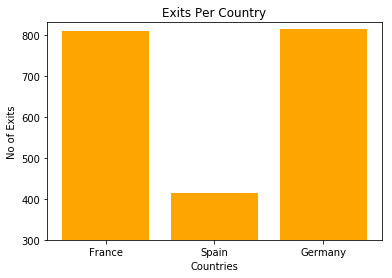

In [16]:
plt.gca().set(xlabel = 'Countries', ylabel = 'No of Exits', Title = 'Exits Per Country')
plt.ylim(300, 830)
plt.bar(x, y, color = 'Orange')

### Trend of Exits per Gender :
This analysis can be very helpful in deciding whether users of a particular gender are leaving the bank's service more often than the other. 

In [17]:
ExitbyGender =defaultdict(int)
for d in dat:
    if d['Exited'] == 1:
        ExitbyGender[d['Gender']] += 1

<BarContainer object of 2 artists>

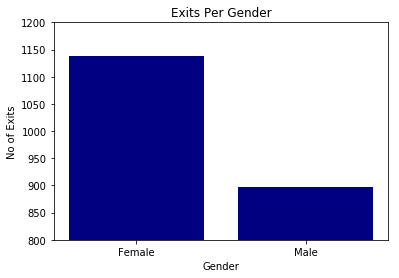

In [18]:
x = [i for i in ExitbyGender.keys()]
y = [ExitbyGender[i] for i in x]
plt.gca().set(xlabel = 'Gender', ylabel = 'No of Exits', Title = 'Exits Per Gender')
plt.ylim(800, 1200)
plt.bar(x, y, color = 'Navy',align = 'center')

### No. of Exits by Active/Non-Active Users

In [19]:
ActiveNonActiveExits = defaultdict(int)
for d in dat:
    if d['Exited'] == 1:
        ActiveNonActiveExits[d['IsActiveMember']] += 1

In [20]:
ActiveNonActiveExits

defaultdict(int, {1: 735, 0: 1302})

<BarContainer object of 2 artists>

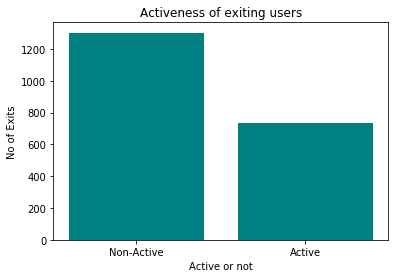

In [21]:
x = [i for i in ActiveNonActiveExits.keys()]
y = [ActiveNonActiveExits[i] for i in x]
plt.gca().set(xlabel = 'Active or not', ylabel = 'No of Exits', Title = 'Activeness of exiting users')
# plt.ylim(800, 1200)
plt.xticks(ticks = [1, 0], labels=['Active', 'Non-Active'])
plt.bar(x, y, color = 'Teal')

### Trend of Exits per Age-group

In [25]:
AgeGroupExits = defaultdict(list)
for d in dat:
    if d['Exited'] == 1:
        if d['Age'] in range(20,30):
            AgeGroupExits[20].append(d['Age'])
        elif d['Age'] in range(30,40):
            AgeGroupExits[30].append(d['Age'])
        elif d['Age'] in range(40,50):
            AgeGroupExits[40].append(d['Age'])
        elif d['Age'] in range(50,60):
            AgeGroupExits[50].append(d['Age'])
        else:            
            AgeGroupExits[60].append(d['Age'])

In [26]:
len(AgeGroupExits[20])

121

<BarContainer object of 5 artists>

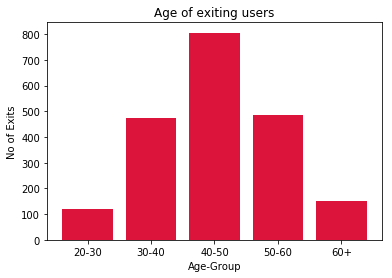

In [27]:
x = [i for i in AgeGroupExits.keys()]
y = [len(AgeGroupExits[i]) for i in x]
plt.gca().set(xlabel = 'Age-Group', ylabel = 'No of Exits', Title = 'Age of exiting users')
# plt.ylim(800, 1200)
plt.xticks(ticks = [20,30,40,50,60], labels=['20-30', '30-40', '40-50', '50-60', '60+'])
plt.bar(x, y, color = 'Crimson', width = 8.0 )


In [32]:
AgeExits = []
for d in dat:
    if d["Exited"] == 1:
        AgeExits.append(d['Age']) 

In [39]:
AgeExits.sort()
AgeExits[-10:]

[71, 71, 71, 71, 71, 71, 72, 73, 74, 84]

In [62]:
Age_bins = list(set(AgeExits))


(array([9.81836033e-04, 4.90918017e-04, 9.81836033e-04, 1.47275405e-03,
        5.89101620e-03, 2.94550810e-03, 6.87285223e-03, 2.94550810e-03,
        6.87285223e-03, 6.38193422e-03, 1.12911144e-02, 1.37457045e-02,
        1.17820324e-02, 1.62002946e-02, 1.57093765e-02, 2.16003927e-02,
        1.62002946e-02, 2.79823270e-02, 2.60186549e-02, 3.04369170e-02,
        3.09278351e-02, 3.53460972e-02, 4.36917035e-02, 3.38733432e-02,
        3.78006873e-02, 4.32007855e-02, 3.58370152e-02, 4.27098675e-02,
        4.46735395e-02, 3.78006873e-02, 3.92734413e-02, 3.68188513e-02,
        3.48551792e-02, 3.24005891e-02, 3.14187531e-02, 1.96367207e-02,
        2.50368189e-02, 2.35640648e-02, 2.45459008e-02, 1.86548846e-02,
        1.42366225e-02, 1.47275405e-02, 1.57093765e-02, 1.03092784e-02,
        1.03092784e-02, 8.83652430e-03, 5.89101620e-03, 3.92734413e-03,
        3.43642612e-03, 2.45459008e-03, 2.94550810e-03, 9.81836033e-04,
        1.96367207e-03, 3.43642612e-03, 4.90918017e-04, 4.909180

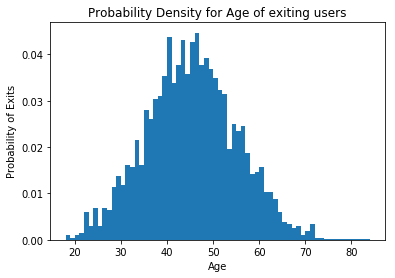

In [61]:
plt.gca().set(xlabel = 'Age', ylabel = 'Probability of Exits', Title = 'Probability Density for Age of exiting users')
plt.hist(AgeExits, bins = Age_bins, density = True)